In [1]:
require(zoo)
require(data.table)


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:zoo':

    yearmon, yearqtr




In [2]:
data <- fread('../../data/my_data/AirQualityUCI.csv')
data

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,V16,V17
<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA
10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA
10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA
10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA
10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA
10/03/2004,23.00.00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA
11/03/2004,00.00.00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,NA,NA
11/03/2004,01.00.00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702,NA,NA
11/03/2004,02.00.00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,NA,NA


In [3]:
# 计算一行中NA的数量, 并删除数量大于2的行(因为正常的只有最后两列为NA)
data_clean <- data[apply(data, 1, function(x) sum(is.na(x))) <= 2]

In [4]:
# 删除最后两列
env <- data_clean[, 1:(ncol(data_clean)-2)]

In [5]:
env

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
10/03/2004,23.00.00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
11/03/2004,00.00.00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
11/03/2004,01.00.00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
11/03/2004,02.00.00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648


In [6]:
# 再检查是否有缺失值
colSums(is.na(env))

Date          Time        CO(GT)   PT08.S1(CO)      NMHC(GT) 
            0             0             0             0             0 
     C6H6(GT) PT08.S2(NMHC)       NOx(GT)  PT08.S3(NOx)       NO2(GT) 
            0             0             0             0             0 
 PT08.S4(NO2)   PT08.S5(O3)             T            RH            AH 
            0             0             0             0             0

In [7]:
# 经检查, 没有缺失值, 可以继续

# 但是经检查, 发现有负数异常值
# 策略: 用该负数前面的5个正常数的平均值替换负数
replace_neg_with_avg <- function(x) {
    for(i in seq_along(x)) {
        if(x[i] < 0) {
            start_idx <- max(1, i - 5)
            end_idx <- i - 1
            if (start_idx <= end_idx) {
                avg_val <- mean(x[start_idx:end_idx])
                x[i] <- avg_val
            }
        }
    }
    return(x)
}

env_f <- env[, lapply(.SD, replace_neg_with_avg)] # .SD: 代表数据集的子集

In [8]:
head(env_f)

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
10/03/2004,23.00.00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


In [9]:
# 绘制图像

# 绘制
library(ggplot2)
# 将Date与Time转换为POSIXct格式, 创建DateTime列


In [10]:
env_f[, DateTime_str := paste(Date, Time)]
print(env_f$DateTime_str)

   [1] "10/03/2004 18.00.00" "10/03/2004 19.00.00" "10/03/2004 20.00.00"
   [4] "10/03/2004 21.00.00" "10/03/2004 22.00.00" "10/03/2004 23.00.00"
   [7] "11/03/2004 00.00.00" "11/03/2004 01.00.00" "11/03/2004 02.00.00"
  [10] "11/03/2004 03.00.00" "11/03/2004 04.00.00" "11/03/2004 05.00.00"
  [13] "11/03/2004 06.00.00" "11/03/2004 07.00.00" "11/03/2004 08.00.00"
  [16] "11/03/2004 09.00.00" "11/03/2004 10.00.00" "11/03/2004 11.00.00"
  [19] "11/03/2004 12.00.00" "11/03/2004 13.00.00" "11/03/2004 14.00.00"
  [22] "11/03/2004 15.00.00" "11/03/2004 16.00.00" "11/03/2004 17.00.00"
  [25] "11/03/2004 18.00.00" "11/03/2004 19.00.00" "11/03/2004 20.00.00"
  [28] "11/03/2004 21.00.00" "11/03/2004 22.00.00" "11/03/2004 23.00.00"
  [31] "12/03/2004 00.00.00" "12/03/2004 01.00.00" "12/03/2004 02.00.00"
  [34] "12/03/2004 03.00.00" "12/03/2004 04.00.00" "12/03/2004 05.00.00"
  [37] "12/03/2004 06.00.00" "12/03/2004 07.00.00" "12/03/2004 08.00.00"
  [40] "12/03/2004 09.00.00" "12/03/2004 10.00.00" 

In [11]:
env_f[, DateTime := as.POSIXct(DateTime_str, format="%m/%d/%Y %H.%M.%S")]

In [12]:
env_f[, c("DateTime_str", "Date", "Time") := NULL]

In [13]:
summary(env_f)

     CO(GT)        PT08.S1(CO)      NMHC(GT)         C6H6(GT)    
 Min.   : 0.100   Min.   : 647   Min.   :   7.0   Min.   : 0.10  
 1st Qu.: 1.127   1st Qu.: 939   1st Qu.: 272.0   1st Qu.: 4.50  
 Median : 1.700   Median :1066   Median : 272.0   Median : 8.30  
 Mean   : 2.104   Mean   :1102   Mean   : 265.1   Mean   :10.16  
 3rd Qu.: 2.700   3rd Qu.:1236   3rd Qu.: 272.0   3rd Qu.:14.00  
 Max.   :11.900   Max.   :2040   Max.   :1189.0   Max.   :63.70  
                                                                 
 PT08.S2(NMHC)       NOx(GT)        PT08.S3(NOx)     NO2(GT)      
 Min.   : 383.0   Min.   :   2.0   Min.   : 322   Min.   :  2.00  
 1st Qu.: 739.0   1st Qu.: 100.0   1st Qu.: 654   1st Qu.: 76.77  
 Median : 912.0   Median : 183.0   Median : 807   Median :104.01  
 Mean   : 941.9   Mean   : 240.6   Mean   : 833   Mean   :109.80  
 3rd Qu.:1117.0   3rd Qu.: 309.0   3rd Qu.: 965   3rd Qu.:137.00  
 Max.   :2214.0   Max.   :1479.0   Max.   :2683   Max.   :340.00  
   

In [14]:
head(env_f)

CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-10-03 18:00:00
2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-10-03 19:00:00
2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-10-03 20:00:00
2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-10-03 21:00:00
1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-10-03 22:00:00
1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,2004-10-03 23:00:00


In [15]:
env_f

CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2.60,1360,150,11.9,1046,166.0,1056,113,1692,1268,13.6,48.9,0.7578,2004-10-03 18:00:00
2.00,1292,112,9.4,955,103.0,1174,92,1559,972,13.3,47.7,0.7255,2004-10-03 19:00:00
2.20,1402,88,9.0,939,131.0,1140,114,1555,1074,11.9,54.0,0.7502,2004-10-03 20:00:00
2.20,1376,80,9.2,948,172.0,1092,122,1584,1203,11.0,60.0,0.7867,2004-10-03 21:00:00
1.60,1272,51,6.5,836,131.0,1205,116,1490,1110,11.2,59.6,0.7888,2004-10-03 22:00:00
1.20,1197,38,4.7,750,89.0,1337,96,1393,949,11.2,59.2,0.7848,2004-10-03 23:00:00
1.20,1185,31,3.6,690,62.0,1462,77,1333,733,11.3,56.8,0.7603,2004-11-03 00:00:00
1.00,1136,31,3.3,672,62.0,1453,76,1333,730,10.7,60.0,0.7702,2004-11-03 01:00:00
0.90,1094,24,2.3,609,45.0,1579,60,1276,620,10.7,59.7,0.7648,2004-11-03 02:00:00


In [16]:
# 设置开始和结束时间
start_time <- as.POSIXct("2004-10-03 22:00:00")
end_time <- as.POSIXct("2004-10-10 22:00:00")

# 筛选时间范围内的数据
enfv_filtered <- env_f[DateTime >= start_time & DateTime <= end_time]

# 查看筛选后的数据
head(enfv_filtered)

CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1.6,1272,51,6.5,836,131.0,1205,116.0,1490,1110,11.2,59.6,0.7888,2004-10-03 22:00:00
1.2,1197,38,4.7,750,89.0,1337,96.0,1393,949,11.2,59.2,0.7848,2004-10-03 23:00:00
1.3,1047,77,5.4,783,83.0,1014,79.0,1449,975,12.0,66.9,0.9336,2004-10-04 00:00:00
1.7,1116,98,6.9,854,118.0,929,78.0,1533,1034,11.5,70.1,0.9503,2004-10-04 01:00:00
1.7,1074,102,6.4,832,101.0,951,75.0,1507,980,11.4,69.8,0.9390,2004-10-04 02:00:00
1.0,922,65,3.6,687,126.8,1142,85.8,1390,825,11.1,69.3,0.9128,2004-10-04 03:00:00


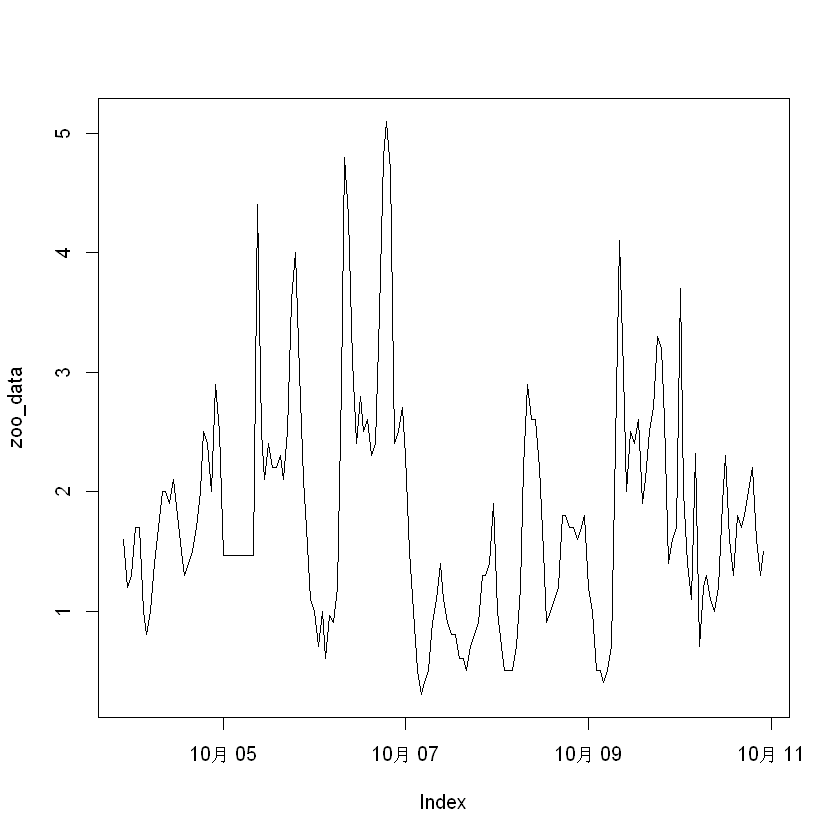

In [17]:
# 绘制图像
require(zoo)
zoo_data <- zoo(enfv_filtered$"CO(GT)", order.by = enfv_filtered$"DateTime")
plot(zoo_data)

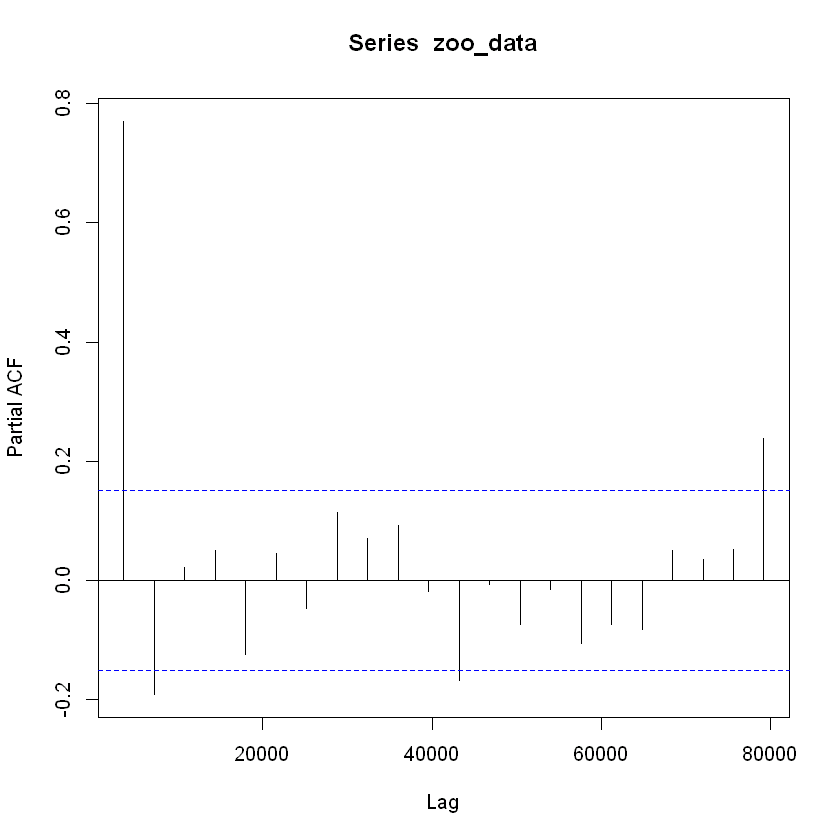

In [18]:
# 偏自相关函数
pacf(zoo_data)

In [19]:
fit <- ar(zoo_data, method = "mle") # mle: 最大似然估计拟合AR模型
fit


Call:
ar(x = zoo_data, method = "mle")

Coefficients:
      1        2  
 0.9128  -0.1887  

Order selected 2  sigma^2 estimated as  0.3588

以上的输出表示:
- **Coefficients**:
  拟合的 AR 模型的系数。模型的阶数是 2，因此会有两个系数：
    - 第一个系数（0.9128） 对应的是滞后期 1（即 AR(1)），表示上一时刻的值对当前时刻的影响。
    - 第二个系数（-0.1887） 对应的是滞后期 2（即 AR(2)），表示前两时刻的值对当前时刻的影响。
- **Order selected**:
  模型选择了阶数为 2 的 AR 模型
- **sigma^2 estimated as**:
  模型的残差方差（`sigma^2`），即模型预测误差的方差。它表示拟合模型后的残差的波动程度。较小的 sigma^2 值通常表示模型拟合得比较好

In [ ]:
# 手动设置阶次
est <- arima(x = zoo_data, order = c(3, 0, 0))  # 拟合AR(3)
est


Call:
arima(x = zoo_data, order = c(3, 0, 0))

Coefficients:
         ar1      ar2     ar3  intercept
      0.9165  -0.2069  0.0197     1.7846
s.e.  0.0766   0.1031  0.0765     0.1682

sigma^2 estimated as 0.3586:  log likelihood = -153.63,  aic = 317.27

fixed = c(0, NA, NA, NA) 表示：
- 第一个参数（通常是 AR(1) 的系数）被固定为 0。
- 第二、第三、第四个参数（即 AR(2)、AR(3)、常数项等）将会被估计，因它们的值为 NA。

In [21]:
# 将先验知识引入模型（本例中将ar(1)设置为0）
est_1 <- arima(x = zoo_data, order = c(3, 0, 0), fixed = c(0, NA, NA, NA))
est_1

Warning message in arima(x = zoo_data, order = c(3, 0, 0), fixed = c(0, NA, NA, :
"some AR parameters were fixed: setting transform.pars = FALSE"



Call:
arima(x = zoo_data, order = c(3, 0, 0), fixed = c(0, NA, NA, NA))

Coefficients:
      ar1     ar2      ar3  intercept
        0  0.6064  -0.1268     1.7807
s.e.    0  0.0925   0.0924     0.1193

sigma^2 estimated as 0.6636:  log likelihood = -205.67,  aic = 419.33

## 检查模型的拟合优度

### **1.可视化模型残差的自相关函数**
如果存在自相关性， 则说明可能存在模型未学习到的模式

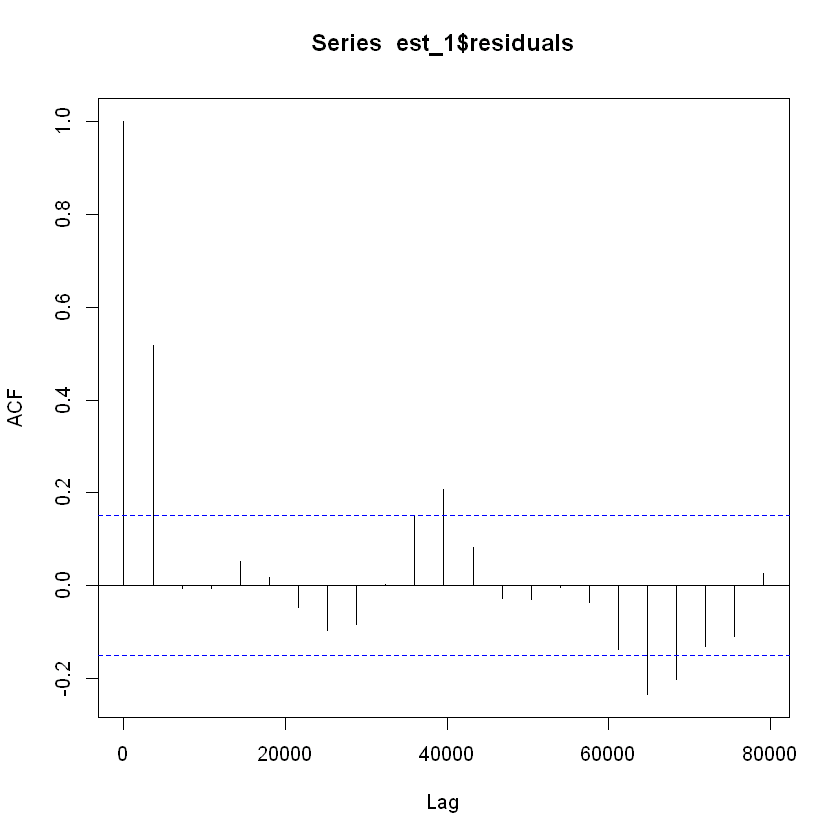

In [ ]:
# AR(3)的残差的自相关函数（利用arima）
acf(est_1$residuals)

### **2.杨-博克斯检验**(Ljung-Box test)
检验时间序列整体的随机性
- H0：数据并没有展示出序列相关性
- H1：数据展示出序列相关性

In [35]:
Box.test(est_1$residuals, lag = 10, type = "Ljung", fitdf = 3)


	Box-Ljung test

data:  est_1$residuals
X-squared = 54.064, df = 7, p-value = 2.284e-09


## 预测值

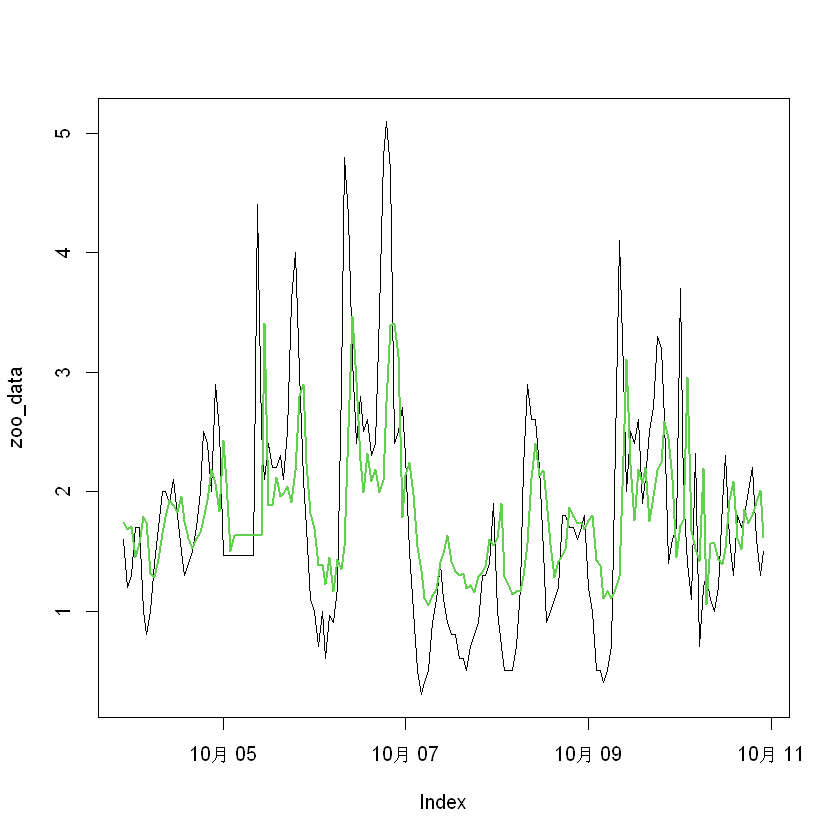

In [36]:
require(forecast)
plot(zoo_data, type = 'l')
lines(fitted(est_1), col = 3, lwd = 2)

## 其他

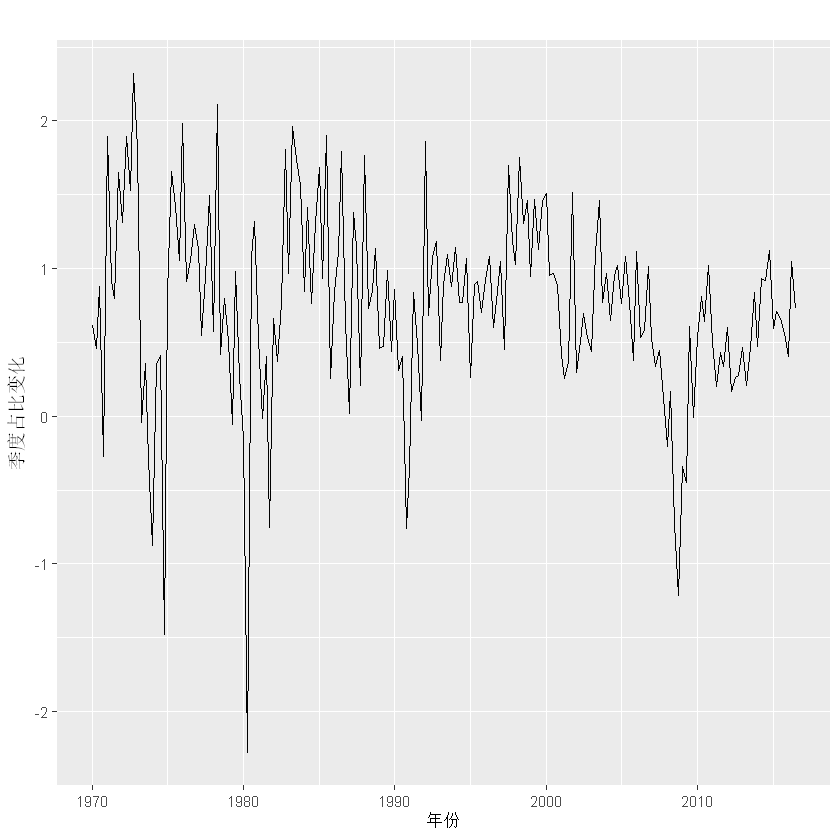

In [30]:
library(fpp2)
# 查看 uschange 数据
data("uschange")
autoplot(uschange[,"Consumption"]) +
  xlab("年份") + ylab("季度占比变化")+
  theme(plot.title = element_text(hjust = 0.5))

In [33]:
fit <- auto.arima(uschange[,"Consumption"], seasonal = FALSE)
fit

Series: uschange[, "Consumption"] 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
         ar1      ma1     ma2     ma3    mean
      0.5885  -0.3528  0.0846  0.1739  0.7454
s.e.  0.1541   0.1658  0.0818  0.0843  0.0930

sigma^2 = 0.3499:  log likelihood = -164.81
AIC=341.61   AICc=342.08   BIC=361

`%>%` 是 `magrittr` 包中的管道操作符，它允许你将一个表达式的结果传递给下一个函数作为输入。这种方式使代码更简洁、更易读

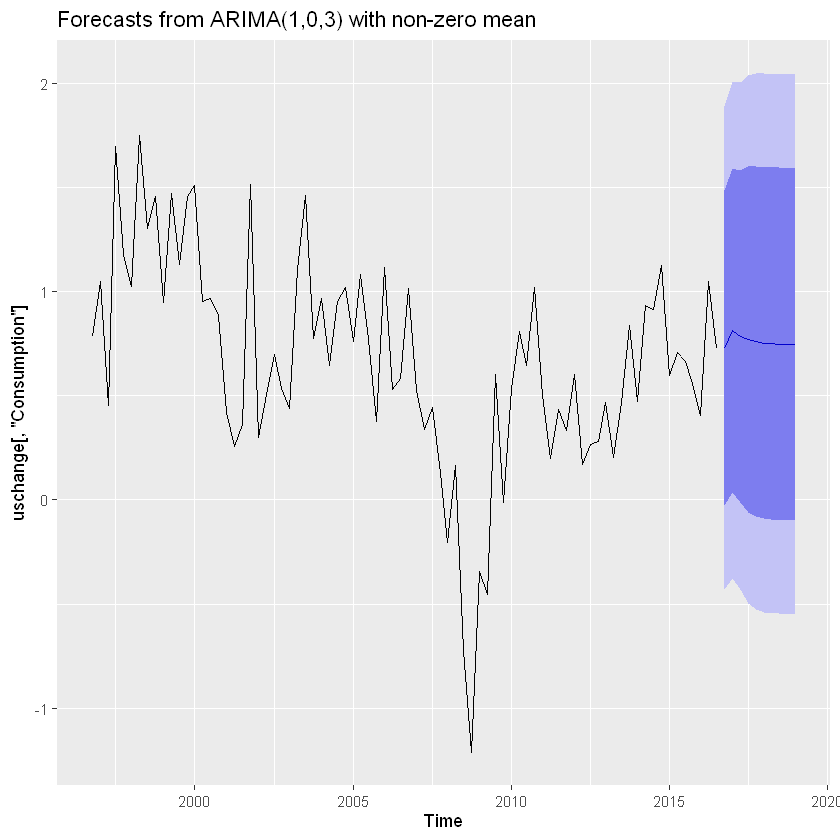

In [34]:
fit %>% forecast(h=10) %>% autoplot(include=80)